In [27]:
!pip install wordcloud

#워드클라우드 import
from wordcloud import WordCloud

#워드를 카운팅해주는 라이브러리
from collections import Counter

#데이터를 시각화 해주는 라이브러리
import matplotlib.pyplot as plt

In [5]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time
from bs4 import BeautifulSoup as bs
from selenium.webdriver.common.keys import Keys

driver = webdriver.Chrome(ChromeDriverManager().install())

#sbs뉴스-최신뉴스
driver.get("https://news.sbs.co.kr/news/newsflash.do?plink=NEW&cooper=SBSNEWSMAIN")
driver.maximize_window()
time.sleep(1)

#객체화
soup = bs(driver.page_source, 'html.parser')

title_list = []
text_list = []

#url 보관
#https://news.sbs.co.kr/news/newsflash.do?pageDate=20220915&pageIdx=2
url_list = []
for i in range(1, 6):
    page_url = f'https://news.sbs.co.kr/news/newsflash.do?pageDate=20220915&pageIdx={i}'
    print(page_url)
    driver.get(page_url)
    #웹페이지 변동시 로딩시간 주는게 좋음
    time.sleep(1)


    for i in range(1, 3):
        img = driver.find_element_by_css_selector(f'#container > div > div.w_news_list.type_issue > ul > li:nth-child({i}) > a.news > span > img')
        img.click()
        #기사 제목 추출
        #print('제목: ')
        title = driver.find_elements_by_css_selector('#vmNewsTitle')
        #for i in title:
        #    print(i.text)

        for i in title:
            title_list.append(i.text)

        #기사내용 추출
        #print('내용: ')
        text = driver.find_elements_by_css_selector('#container > div.w_inner > div.w_article > div.w_article_cont > div.w_article_left > div.article_cont_area > div.main_text > div')
        #for i in text:
        #    print(i.text)
        for i in text:
            text_list.append(i.text)
        driver.back()

    
    search = soup.select('a.news')
    for i in search:
        url_list.append('https://news.sbs.co.kr/'+i['href'])

https://news.sbs.co.kr/news/newsflash.do?pageDate=20220915&pageIdx=1
https://news.sbs.co.kr/news/newsflash.do?pageDate=20220915&pageIdx=2
https://news.sbs.co.kr/news/newsflash.do?pageDate=20220915&pageIdx=3
https://news.sbs.co.kr/news/newsflash.do?pageDate=20220915&pageIdx=4
https://news.sbs.co.kr/news/newsflash.do?pageDate=20220915&pageIdx=5


In [6]:
title_list

['정진석 "한일 윈윈하자…DJ-오부치 선언 시절로 복귀해야"',
 "'낭만닥터 김사부3' 제작 확정, 한석규X안효섭X이성경 다시 뭉친다",
 '정진석 "한일 \'윈윈\'하는 관계로 거듭나야"',
 '교육부 "복지 시스템 장애, 대입 영향 없도록 대응"',
 '\'고구려 뺀 중국 전시\'에…"시정 없으면 전시품 철수"',
 '검찰 "쌍방울 전환사채 편법 발행 의심 정황…이재명 변호사비 대납 여지"',
 "[문화현장] 수리남 장악한 한국인 마약왕 체포기…'수리남'",
 '볼보 · 폴스타 등 수입차 7만 대 제작결함 리콜',
 "뉴질랜드 '가방 속 어린이 시신' 친모 용의자 검거",
 "'촉법소년' 이용해 대전 금은방 턴 10~20대 무더기 검거"]

In [7]:
text_list

['국민의힘 정진석 비상대책위원장은 "한일 양국이 올바른 미래지향적 관계로 발전해 나가야 한다"며 "양국이 처한 엄중한 상황에 대해 성찰하고 \'윈윈\'하는 관계로 거듭나야 한다"고 말했습니다.\n\n정 위원장은 제주국제컨벤션센터에서 열린 제17회 \'평화와 번영을 위한 제주포럼\'에서 한일의원연맹 회장 자격으로 한 한일의원특별세션 개회사를 통해 이같이 밝혔습니다.\n\n정 위원장은 동북아를 비롯한 국제 정세와 관련해 "미·중 간의 대립과 러시아-우크라이나 간 전쟁 등으로 국제정세가 꽁꽁 얼어붙고 전 세계적 물가상승 압력 등 경제 불황이 지속되고 있으며, 강대국들은 저마다 내셔널리즘(nationalism·국가주의)과 자국 실리추구에 여념이 없다"고 진단했습니다.\n\n특히 "이런 가운데 북한의 핵과 미사일 위협은 이제 한반도뿐만 아니라 국제적 불안 요소로 다가오고 있는 게 엄연한 현실이다. 북한 김정은은 며칠 전 핵보유국을 법제화했고, 무슨 일이 있어도 핵을 포기하지 않겠다면서 핵 선제공격을 공언했다"며 "한일 양국 안보의 큰 틀이 흔들리고 있다"고 말했습니다.\n\n정 위원장은 "새로운 비전과 실행력이 절실하다"며 "어느 한쪽에 해법을 마련하라고만 주장하는 것은, 서로에게 아무런 도움이 되지 않는다"며 이날 포럼에 참석한 한일 양국 의회 및 정치권 관계자들에게 당부했습니다.\n\n그러면서 "24년 전 김대중(DJ) 대통령과 오부치 게이조 총리는 \'21세기 한·일 새 파트너십 공동선언\'을 발표했다"며 "한일관계를 그 시절로 시급하게 복귀시켜야 한다"고 말했습니다.\n\n지난 1998년 10월 당시 김 대통령과 오부치 총리는 도쿄에서 열린 한일정상회담에서 공동선언을 발표했습니다.\n\n\'김대중-오부치 선언\'으로 불리는 한일 양국 두 정상의 공동선언에는 양국이 과거를 직시하고 상호 이해·신뢰에 기초한 관계를 발전시켜 나간다는 점과 함께 오부치 총리가 과거 식민지 지배에 대해 \'통절한 반성과 마음으로부터의 사죄했다\'는 내용이 포함됐습니다.\n\n정 위원장

In [19]:
import pickle

In [9]:
#저장하기
with open('news_data.pkl', 'wb') as f:
    pickle.dump(text_list, f)

In [39]:
#불러오기
with open('news_data.pkl', 'rb') as f:

    #저장한 거 data라는 변수에 넣기
    news = pickle.load(f)

In [40]:
#불러온 파일 출력
news

['국민의힘 정진석 비상대책위원장은 "한일 양국이 올바른 미래지향적 관계로 발전해 나가야 한다"며 "양국이 처한 엄중한 상황에 대해 성찰하고 \'윈윈\'하는 관계로 거듭나야 한다"고 말했습니다.\n\n정 위원장은 제주국제컨벤션센터에서 열린 제17회 \'평화와 번영을 위한 제주포럼\'에서 한일의원연맹 회장 자격으로 한 한일의원특별세션 개회사를 통해 이같이 밝혔습니다.\n\n정 위원장은 동북아를 비롯한 국제 정세와 관련해 "미·중 간의 대립과 러시아-우크라이나 간 전쟁 등으로 국제정세가 꽁꽁 얼어붙고 전 세계적 물가상승 압력 등 경제 불황이 지속되고 있으며, 강대국들은 저마다 내셔널리즘(nationalism·국가주의)과 자국 실리추구에 여념이 없다"고 진단했습니다.\n\n특히 "이런 가운데 북한의 핵과 미사일 위협은 이제 한반도뿐만 아니라 국제적 불안 요소로 다가오고 있는 게 엄연한 현실이다. 북한 김정은은 며칠 전 핵보유국을 법제화했고, 무슨 일이 있어도 핵을 포기하지 않겠다면서 핵 선제공격을 공언했다"며 "한일 양국 안보의 큰 틀이 흔들리고 있다"고 말했습니다.\n\n정 위원장은 "새로운 비전과 실행력이 절실하다"며 "어느 한쪽에 해법을 마련하라고만 주장하는 것은, 서로에게 아무런 도움이 되지 않는다"며 이날 포럼에 참석한 한일 양국 의회 및 정치권 관계자들에게 당부했습니다.\n\n그러면서 "24년 전 김대중(DJ) 대통령과 오부치 게이조 총리는 \'21세기 한·일 새 파트너십 공동선언\'을 발표했다"며 "한일관계를 그 시절로 시급하게 복귀시켜야 한다"고 말했습니다.\n\n지난 1998년 10월 당시 김 대통령과 오부치 총리는 도쿄에서 열린 한일정상회담에서 공동선언을 발표했습니다.\n\n\'김대중-오부치 선언\'으로 불리는 한일 양국 두 정상의 공동선언에는 양국이 과거를 직시하고 상호 이해·신뢰에 기초한 관계를 발전시켜 나간다는 점과 함께 오부치 총리가 과거 식민지 지배에 대해 \'통절한 반성과 마음으로부터의 사죄했다\'는 내용이 포함됐습니다.\n\n정 위원장

In [38]:
#형태소 분석기를 통해 텍스트 정제하기
from konlpy.tag import Okt
okt = Okt()

In [41]:
#뉴스 3개만 뽑아주기
news = news[:3]

In [42]:
total = ''

for i in news:
    string = i.replace("\n", '')
    string = string.replace('\'', '')
    total = total + string

In [43]:
total

'국민의힘 정진석 비상대책위원장은 "한일 양국이 올바른 미래지향적 관계로 발전해 나가야 한다"며 "양국이 처한 엄중한 상황에 대해 성찰하고 윈윈하는 관계로 거듭나야 한다"고 말했습니다.정 위원장은 제주국제컨벤션센터에서 열린 제17회 평화와 번영을 위한 제주포럼에서 한일의원연맹 회장 자격으로 한 한일의원특별세션 개회사를 통해 이같이 밝혔습니다.정 위원장은 동북아를 비롯한 국제 정세와 관련해 "미·중 간의 대립과 러시아-우크라이나 간 전쟁 등으로 국제정세가 꽁꽁 얼어붙고 전 세계적 물가상승 압력 등 경제 불황이 지속되고 있으며, 강대국들은 저마다 내셔널리즘(nationalism·국가주의)과 자국 실리추구에 여념이 없다"고 진단했습니다.특히 "이런 가운데 북한의 핵과 미사일 위협은 이제 한반도뿐만 아니라 국제적 불안 요소로 다가오고 있는 게 엄연한 현실이다. 북한 김정은은 며칠 전 핵보유국을 법제화했고, 무슨 일이 있어도 핵을 포기하지 않겠다면서 핵 선제공격을 공언했다"며 "한일 양국 안보의 큰 틀이 흔들리고 있다"고 말했습니다.정 위원장은 "새로운 비전과 실행력이 절실하다"며 "어느 한쪽에 해법을 마련하라고만 주장하는 것은, 서로에게 아무런 도움이 되지 않는다"며 이날 포럼에 참석한 한일 양국 의회 및 정치권 관계자들에게 당부했습니다.그러면서 "24년 전 김대중(DJ) 대통령과 오부치 게이조 총리는 21세기 한·일 새 파트너십 공동선언을 발표했다"며 "한일관계를 그 시절로 시급하게 복귀시켜야 한다"고 말했습니다.지난 1998년 10월 당시 김 대통령과 오부치 총리는 도쿄에서 열린 한일정상회담에서 공동선언을 발표했습니다.김대중-오부치 선언으로 불리는 한일 양국 두 정상의 공동선언에는 양국이 과거를 직시하고 상호 이해·신뢰에 기초한 관계를 발전시켜 나간다는 점과 함께 오부치 총리가 과거 식민지 지배에 대해 통절한 반성과 마음으로부터의 사죄했다는 내용이 포함됐습니다.정 위원장은 이시노 우에니모 산넨(돌 위에서도 3년)이라는 일본 속담을 인용하면서 "돌 위에서도 3년 동

In [44]:
from konlpy.tag import Okt
okt = Okt()

stopwords = ['있다', '하다', '되다']

def extract_tag3(string):
    
    result_words = []

    result = okt.pos(string, stem=True, norm=True)
    for word, tag in result:       
        if tag in ['Verb', 'Noun', 'Adjective']:
            if word not in stopwords:
                result_words.append(word)
    return result_words


text_data = extract_tag3(total)
text_data

['국민',
 '힘',
 '정진석',
 '비상',
 '대책',
 '위원장',
 '한일',
 '양국',
 '올바르다',
 '미래',
 '지향',
 '관계',
 '발전',
 '나가야',
 '며',
 '양국',
 '처',
 '엄중하다',
 '상황',
 '대해',
 '성찰',
 '윈윈하',
 '관계',
 '거듭',
 '나야',
 '고',
 '말',
 '정',
 '위원장',
 '국제',
 '컨벤션',
 '센터',
 '열리다',
 '제',
 '평화',
 '번영',
 '위',
 '포럼',
 '의원',
 '연맹',
 '회장',
 '자격',
 '의원',
 '특별',
 '세션',
 '개회',
 '사르다',
 '통해',
 '밝히다',
 '정',
 '위원장',
 '동북아',
 '비롯',
 '국제',
 '정세',
 '관련',
 '밉다',
 '중',
 '간의',
 '대립',
 '러시아',
 '우크라이나',
 '간',
 '전쟁',
 '등',
 '국제',
 '정세',
 '꽁꽁',
 '얼어붙다',
 '전',
 '세계',
 '물가',
 '상승',
 '압력',
 '등',
 '경제',
 '불황',
 '지속',
 '강대국',
 '저',
 '내셔널리즘',
 '국가',
 '주의',
 '과',
 '자국',
 '실리',
 '추구',
 '여념',
 '없다',
 '고',
 '진단',
 '이렇다',
 '가운데',
 '북한',
 '핵',
 '미사일',
 '위협',
 '이제',
 '한반도',
 '아니다',
 '국제',
 '불안',
 '요소',
 '다가오다',
 '게',
 '엄연하다',
 '현실',
 '북한',
 '김정은',
 '며칠',
 '전',
 '핵보유국',
 '법',
 '제화',
 '무슨',
 '핵',
 '포기',
 '않다',
 '핵',
 '선제',
 '공격',
 '공언',
 '며',
 '한일',
 '양국',
 '안보',
 '크다',
 '틀',
 '흔들리다',
 '고',
 '말',
 '정',
 '위원장',
 '새롭다',
 '비',
 '전과',
 '실행',
 '절실',
 '며',
 '한쪽',
 '해법',
 '

In [45]:
count = Counter(text_data)
count

Counter({'국민': 2,
         '힘': 3,
         '정진석': 2,
         '비상': 2,
         '대책': 2,
         '위원장': 10,
         '한일': 6,
         '양국': 13,
         '올바르다': 2,
         '미래': 3,
         '지향': 3,
         '관계': 7,
         '발전': 3,
         '나가야': 2,
         '며': 7,
         '처': 2,
         '엄중하다': 2,
         '상황': 2,
         '대해': 3,
         '성찰': 2,
         '윈윈하': 2,
         '거듭': 2,
         '나야': 2,
         '고': 8,
         '말': 6,
         '정': 8,
         '국제': 8,
         '컨벤션': 2,
         '센터': 2,
         '열리다': 3,
         '제': 3,
         '평화': 2,
         '번영': 2,
         '위': 4,
         '포럼': 3,
         '의원': 4,
         '연맹': 2,
         '회장': 2,
         '자격': 2,
         '특별': 2,
         '세션': 2,
         '개회': 4,
         '사르다': 4,
         '통해': 2,
         '밝히다': 2,
         '동북아': 2,
         '비롯': 2,
         '정세': 4,
         '관련': 2,
         '밉다': 2,
         '중': 2,
         '간의': 2,
         '대립': 2,
         '러시아': 2,
         '우크라이나': 2,


In [46]:
#빈출단어 뽑기
count.most_common(10)

[('김', 14),
 ('양국', 13),
 ('닥터', 13),
 ('사부', 13),
 ('낭만', 12),
 ('시즌', 12),
 ('위원장', 10),
 ('고', 8),
 ('정', 8),
 ('국제', 8)]

#### 워드클라우드 선언하기

In [ ]:
#폰트경로
'C:\Windows\Fonts\gulim.ttc'
'C:\\Windows\\Fonts\\gulim.ttc'

In [55]:
#이미지를 불러올 수 있는 라이브러리 추가 실행
from PIL import Image
import numpy as np

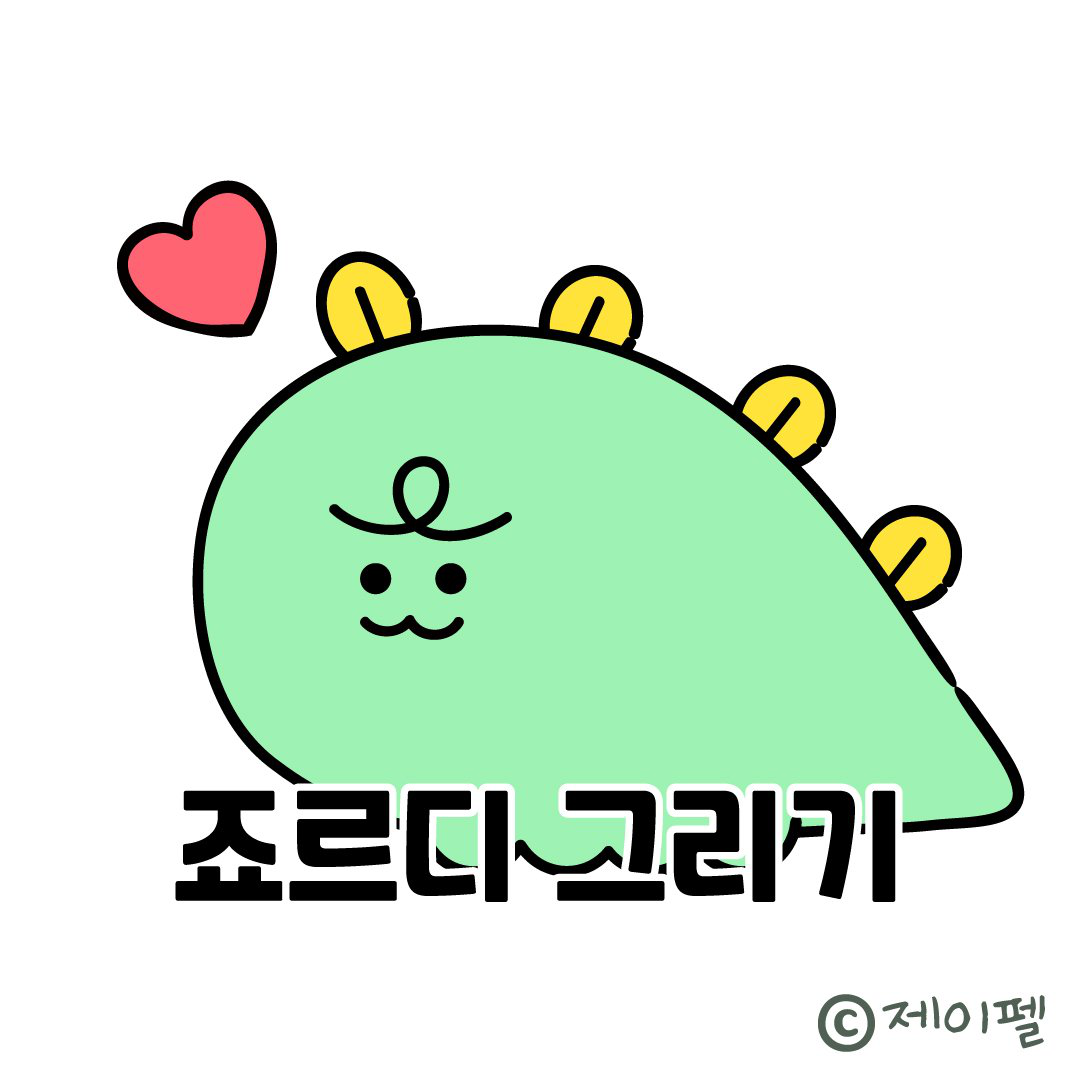

In [63]:
#이미지 불러오기
mask_image = Image.open(r'C:\Users\user\Desktop\죠르디.jpg')
mask_image

In [64]:
#받아온 이미지 행렬화: np.array
mask_image = np.array(Image.open(r'C:\Users\user\Desktop\죠르디.jpg'))

In [65]:
mask_image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [66]:
#mask = mask_image추가하면 불러온 이미지 모양으로 데이터가 추출된다
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\gulim.ttc', width = 700, height = 700, background_color = 'white', 
                      colormap = 'spring', mask = mask_image, random_state =1).generate_from_frequencies(count)

<function matplotlib.pyplot.show(close=None, block=None)>

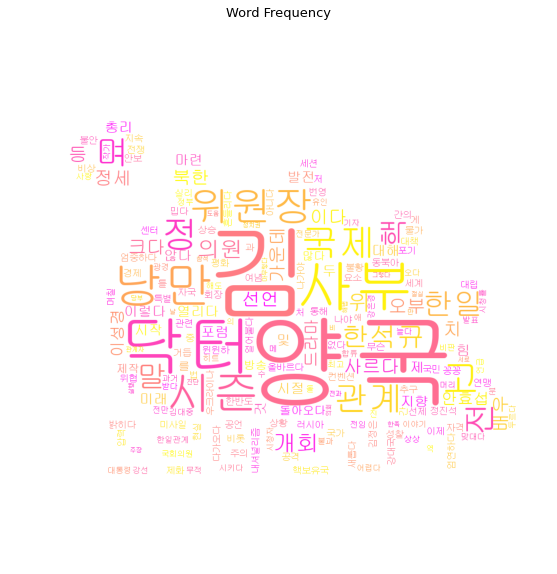

In [67]:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Frequency", size =13)
plt.show